<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/Classification/SVM/sklearn/social_network_ads_svm_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Data preprocessing

### Data loading

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Data preprocessing

In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape

(400, 2)

In [33]:
y.shape

(400,)

#### Splitting the dataset into the Training set and the Test set

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model training and predictions

### Training the Linear and Kernel SVM models on the Training set

In [48]:
from sklearn.svm import SVC

linear_classifier = SVC(kernel='linear')
linear_classifier.fit(X_train, y_train)

kernel_classifier = SVC(kernel='rbf')
kernel_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting the Test set results

In [49]:
linear_y_pred = linear_classifier.predict(X_test)
kernel_y_pred = kernel_classifier.predict(X_test)

#### Creating Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, linear_y_pred)
print(f'Confusion Matrix for linear model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, linear_y_pred)}\n')

cm = confusion_matrix(y_test, kernel_y_pred)
print(f'Confusion Matrix for kernel model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, kernel_y_pred)}')

Confusion Matrix for linear model: 
[[66  2]
 [ 8 24]]
Accuracy: 0.9

Confusion Matrix for kernel model: 
[[64  4]
 [ 3 29]]
Accuracy: 0.93


#### Applying k-fold Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=linear_classifier, X=X_train, y=y_train, cv=10)
print('Linear SVM classifier')
print('Mean accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard deviation: {:.2f}%\n'.format(accuracies.std() * 100))

accuracies = cross_val_score(estimator=kernel_classifier, X=X_train, y=y_train, cv=10)
print('Kernel SVM classifier')
print('Mean accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard deviation: {:.2f}%'.format(accuracies.std() * 100))

Linear SVM classifier
Mean accuracy: 81.33%
Standard deviation: 8.84%

Kernel SVM classifier
Mean accuracy: 90.33%
Standard deviation: 6.57%


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

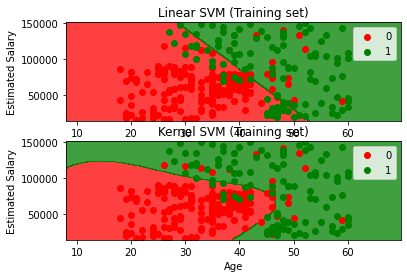

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.subplot(211)
plt.contourf(X1, X2, linear_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(212)
plt.contourf(X1, X2, kernel_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

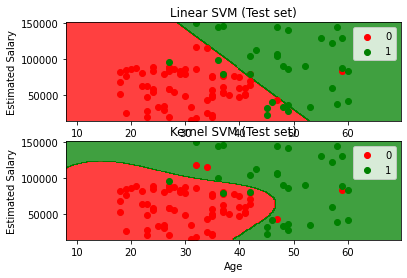

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.subplot(211)
plt.contourf(X1, X2, linear_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(212)
plt.contourf(X1, X2, kernel_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()